#### 라이브러리 로드

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#### 데이터셋 다운로드 및 전처리
- MNIST 데이터셋을 다운로드하고, 텐서로 변환하는 데이터 전처리 수행:

In [2]:
# 데이터 전처리: 이미지를 텐서로 변환하고 정규화
transform = transforms.Compose([
    transforms.ToTensor(), # 이미지를 텐서로 변환
    transforms.Normalize((0.5), (0.5)) # 정규화
])

# 학습 및 테스트 데이터셋 다운로드
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset=torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader=torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
<urlopen error [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다>



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다>



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다>



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다>



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



- transforms.ToTensor(): MNIST의 정수형 픽셀 값(0~255 범위)을 0~1 사이 텐서로 변환
    - 텐서로 변환함으로써 PyTorch 모델에 맞는 입력 형식이 됨
    - 예: 픽셀 값 128 -> (128 / 255) ≈ 0.502
- transforms.Normalize((0.5,), (0.5,)): 0~1 사이의 값을 [-1, 1] 범위로 정규화 
    - X = (X − 0.5) / 0.5
    - 평균 0.5, 표준편차 0.5로 정규화함으로써 학습 안정성을 높임 (경사하강법의 빠른 수렴 유도)
    - 예: 0 → ((0 -0.5) / 0.5) = -1
    - 예: 1 → ((1 -0.5) / 0.5) = 1
- 이 변환은 torchvision.datasets.MNIST(..., transform=transform)에서 트리거됨

#### 신경망 모델 정의

In [3]:
class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) # 입력: 28 * 28 = 784, 출력: 128
        self.fc2 = nn.Linear(128, 64) # 입력: 128, 출력: 64
        self.fc3=nn.Linear(64, 10) # 입력: 64, 출력: 10 (10개의 클래스)

    def forward(self, x):
        x = x.view(-1, 28 * 28) # 배치 크기와 상관없이 1D 텐서로 변환
        x = torch.relu(self.fc1(x)) # ReLU 활성화 함수
        x = torch.relu(self.fc2(x)) # ReLU 활성화 함수
        x = self.fc3(x) # 최종 출력
        return x
    
# 모델 인스턴스 생성
model = MLPNet()

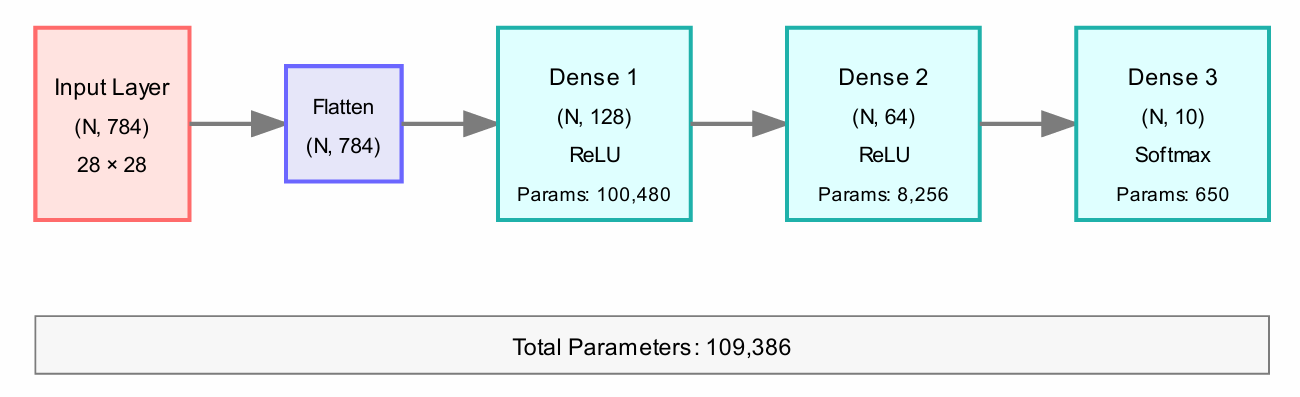

#### 손실 함수 및 옵티마이저 설정

손실 함수로 Cross Entropy Loss를 사용하고, 옵티마이저로 Adam을 설정
- 손실 함수 (Loss Function):
    - 신경망이 예측한 결과와 실제 값 사이의 차이를 측정하는 함수
    - 이 차이를 줄이는 것이 신경망 학습의 목표
- Optimizer:
    - 신경망에서 모델의 가중치와 bais를 업데이트하여 손실함수를 최소화하는 최적화 알고리즘
    - Adam, SGD, RMSProp 등이 있음
    - 여기서는 Adam 옵티마이저를 사용
        - Adam은 데이터가 적을 때 (작은 배치 크기)에도 안정적으로 학습 및 빠르게 수렴

In [4]:
criterion = nn.CrossEntropyLoss() # 손실 함수
optimizer = optim.Adam(model.parameters(), lr = 0.001) # 옵티마이저

#### 모델 훈련

In [5]:
# 모델 훈련
num_epochs = 5 # 에폭 수 (모델을 몇 번 학습 시킬 것인지)

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(trainloader):
        # 기울기 초기화
        optimizer.zero_grad()

        # 순전파
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 역전파
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99: # 100 배치마다 로그 출력
            print(f"Epoch [{epoch + 1} / {num_epochs}], Step [{i + 1 / len(trainloader)}], Loss: {running_loss / 100:.4f}")

Epoch [1 / 5], Step [99.00106609808103], Loss: 1.0737
Epoch [1 / 5], Step [199.00106609808103], Loss: 1.5389
Epoch [1 / 5], Step [299.001066098081], Loss: 1.9300
Epoch [1 / 5], Step [399.001066098081], Loss: 2.3068
Epoch [1 / 5], Step [499.001066098081], Loss: 2.6568
Epoch [1 / 5], Step [599.001066098081], Loss: 2.9746
Epoch [1 / 5], Step [699.001066098081], Loss: 3.2685
Epoch [1 / 5], Step [799.001066098081], Loss: 3.5712
Epoch [1 / 5], Step [899.001066098081], Loss: 3.8503
Epoch [2 / 5], Step [99.00106609808103], Loss: 0.2427
Epoch [2 / 5], Step [199.00106609808103], Loss: 0.4788
Epoch [2 / 5], Step [299.001066098081], Loss: 0.7281
Epoch [2 / 5], Step [399.001066098081], Loss: 0.9279
Epoch [2 / 5], Step [499.001066098081], Loss: 1.1252
Epoch [2 / 5], Step [599.001066098081], Loss: 1.3190
Epoch [2 / 5], Step [699.001066098081], Loss: 1.5211
Epoch [2 / 5], Step [799.001066098081], Loss: 1.7125
Epoch [2 / 5], Step [899.001066098081], Loss: 1.8787
Epoch [3 / 5], Step [99.00106609808103],

#### 모델 평가
- 훈련된 모델의 정확도 (accuracy)를 테스트 데이터셋으로 평가:

In [6]:
# 모델 평가
model.eval() # 평가 모드
correct = 0
total = 0

predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1) # 예측된 클래스
        total += labels.size(0) # 총 샘플 수
        correct += (predicted == labels).sum().item() # 맞춘 샘플 수 (예측값이 실제값과 같은지 비교)
        predictions.extend(predicted.numpy())
        true_labels.extend(labels.numpy())

print(f"Accuracy of the model on the test imgaes: {100 * correct / total:.2f}%")

Accuracy of the model on the test imgaes: 96.88%


#### 예측된 이미지와 레이블 시각화

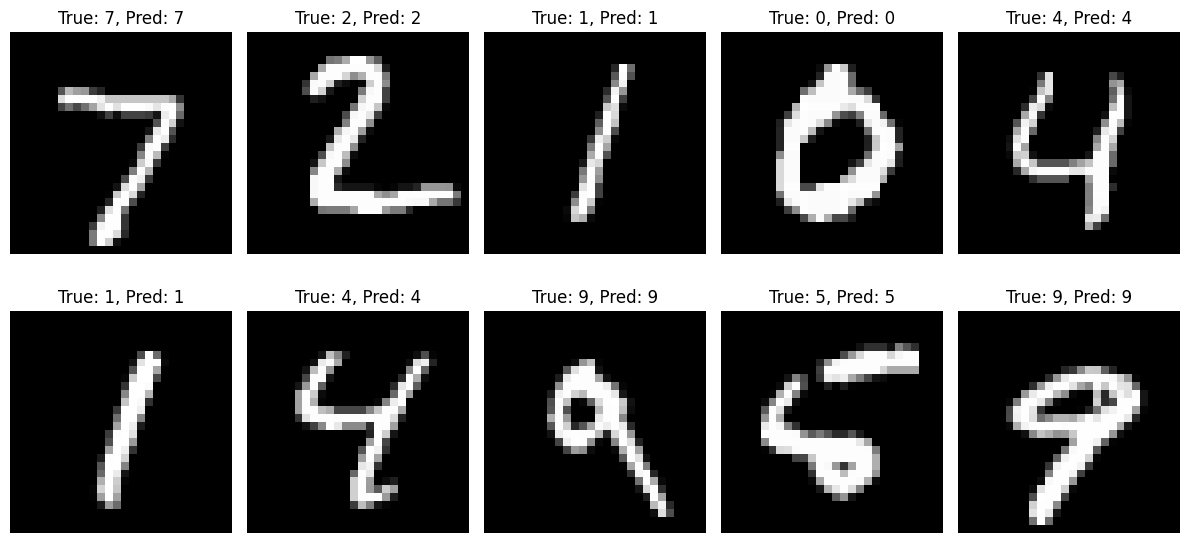

In [7]:
# 시각화: 예측된 이미지와 레이블
def visualize_predictions(images, true_labels, predictions, num=10):
    plt.figure(figsize=(12, 6))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f'True: {true_labels[i]}, Pred: {predictions[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 테스트 이미지와 예측 결과 시각화
visualize_predictions(testset.data, true_labels, predictions, num=10)

#### 모델 저장 및 불러오기
- 훈련한 모델을 저장하고, 필요할 때 불러올 수 있음

In [8]:
# 모델 저장
torch.save(model.state_dict(), 'mnist_model.pth')

# 모델 불러오기
loaded_model = MLPNet()
loaded_model.load_state_dict(torch.load('mnist_model.pth'))

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8576\64384638.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('mnist_mode

<All keys matched successfully>